<a href="https://colab.research.google.com/github/namdori61/COVID-19/blob/master/COVID19_network_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# Load library needed
import math # for math calculation

import pandas as pd # data analysis
import numpy as np # data analysis & linear algebric calculation
import networkx as nx # network analysis

import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting
sns.set(style='whitegrid') # plot style
sns.set(rc={'figure.figsize':(20,12)}) # plot size
sns.set(font_scale = 2) # plot font size

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Network Analysis

## Data Load
Up-to-date dataset until 2020-05-31

In [ ]:
PATH = 'gdrive/My Drive/SNA/data/' # data directory

In [ ]:
# PatientInfo: Epidemiological data of COVID-19 patients in South Korea
patient_info = pd.read_csv(PATH+'PatientInfo.csv') # data load from csv
patient_info.head() # check first 5 rows of data

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [ ]:
df = patient_info[patient_info['infected_by'].notnull()] # extract only 'infected_by' is not null for network analysis

## R1 : COVID-19 infection network characteristic analysis
1. Descriptive statistics for network
2. Network characteristics analysis

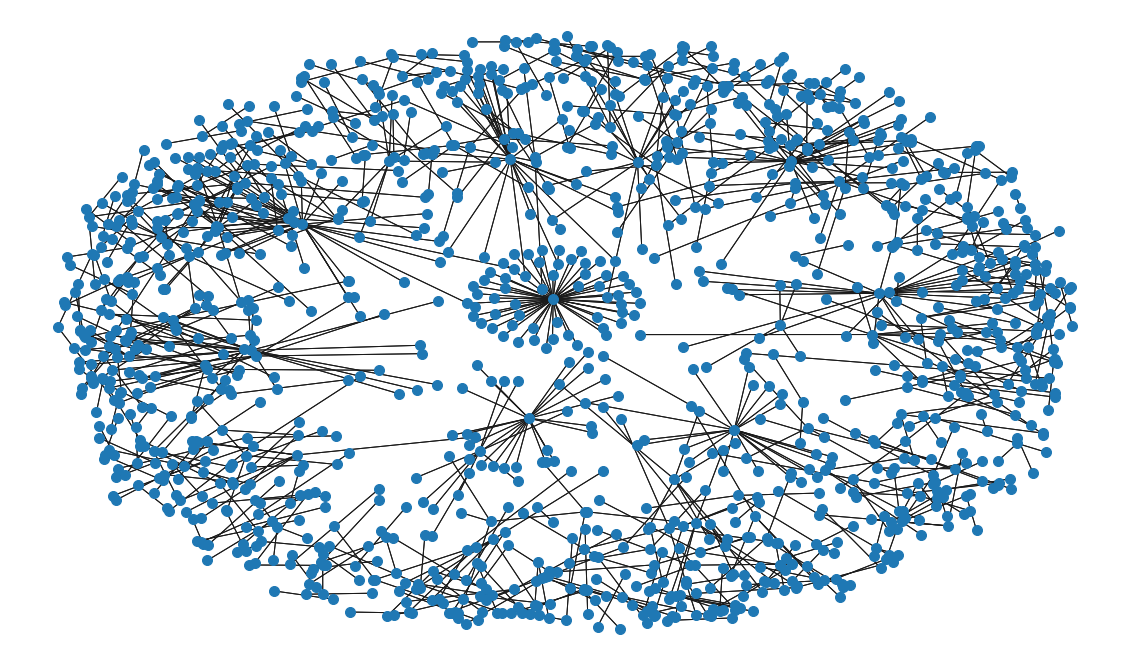

In [ ]:
# Visualize the most simple version graph of patient infection relation

G = nx.from_pandas_edgelist(df, source='patient_id', target='infected_by', edge_attr=True) # from DataFrame, make network edge list of patient infection

G.add_nodes_from(nodes_for_adding=df['patient_id'].tolist()) # add nodes of patients

pos = nx.spring_layout(G, k=5/math.sqrt(G.order()), iterations=50) # position arrangement by iterative algorithm for better sight

nx.draw_networkx(G, pos, node_size=100, with_labels=False) # draw network with nodes
nx.draw_networkx_edges(G, pos) # draw edge

plt.axis('off') # for better watch, remove axis grid from plot
plt.show() # display network plot

### 1.1. Descriptive statistics

In [ ]:
# number of nodes
len(G.nodes)

1313

In [ ]:
# number of edges
len(G.edges)

899

In [ ]:
# number of connected components
nx.number_connected_components(G)

414

In [ ]:
# define function for deviding network to connected component subgraph
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

In [ ]:
# mean_distance is the average number of edges between any two nodes in the network.
i = 0
sum = 0
for g in connected_component_subgraphs(G):
    sum += nx.average_shortest_path_length(g)
    i += 1
sum / i

1.176158875802277

In [ ]:
# density
nx.density(G)

0.0010437371129233

In [ ]:
# transitivity
nx.transitivity(G)

0

In [ ]:
# clustering coefficient
nx.average_clustering(G)

0.0

### 1.2. Network characteristics analysis

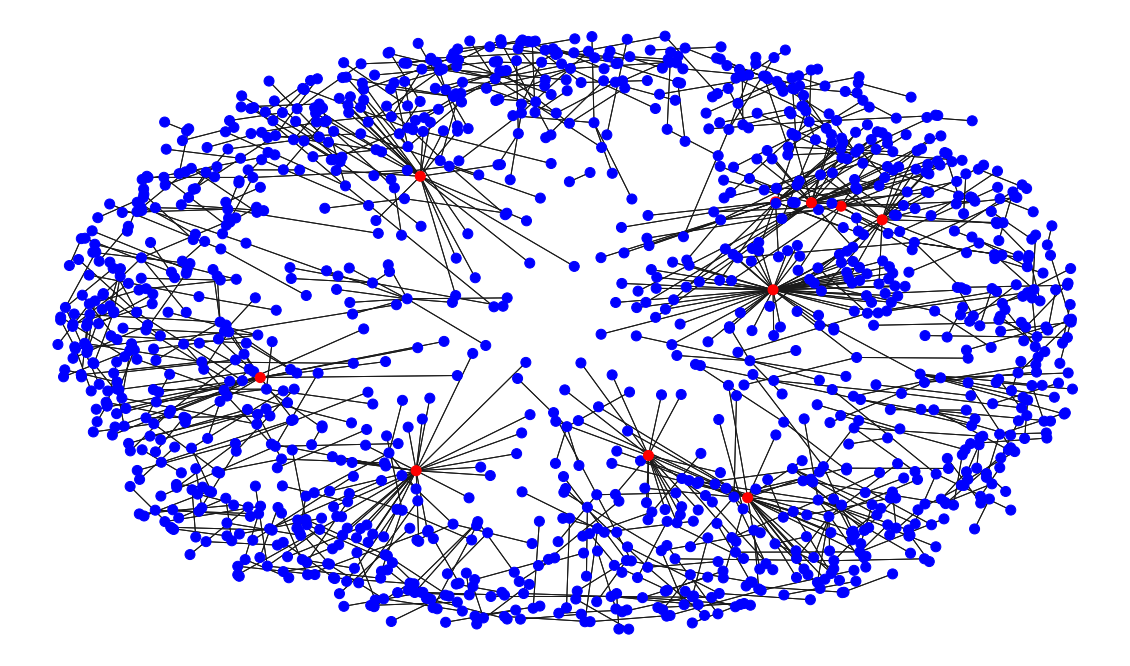

In [ ]:
color_map = [] # color differentiation by degree centrality 10
for (node, val) in G.degree():
    if val > 10:
        color_map.append('red')
    else: 
        color_map.append('blue')

pos = nx.spring_layout(G, k=5/math.sqrt(G.order()), iterations=50) # position arrangement by iterative algorithm for better sight

nx.draw_networkx(G, pos, node_color=color_map, node_size=100, with_labels=False) # draw network with nodes
nx.draw_networkx_edges(G, pos) # draw edge

plt.axis('off') # for better watch, remove axis grid from plot
plt.show() # display network plot

## R2: Superspreader analysis
1. Does supersreader exist?
2. What kind of measures will be eligible to define superspreader?

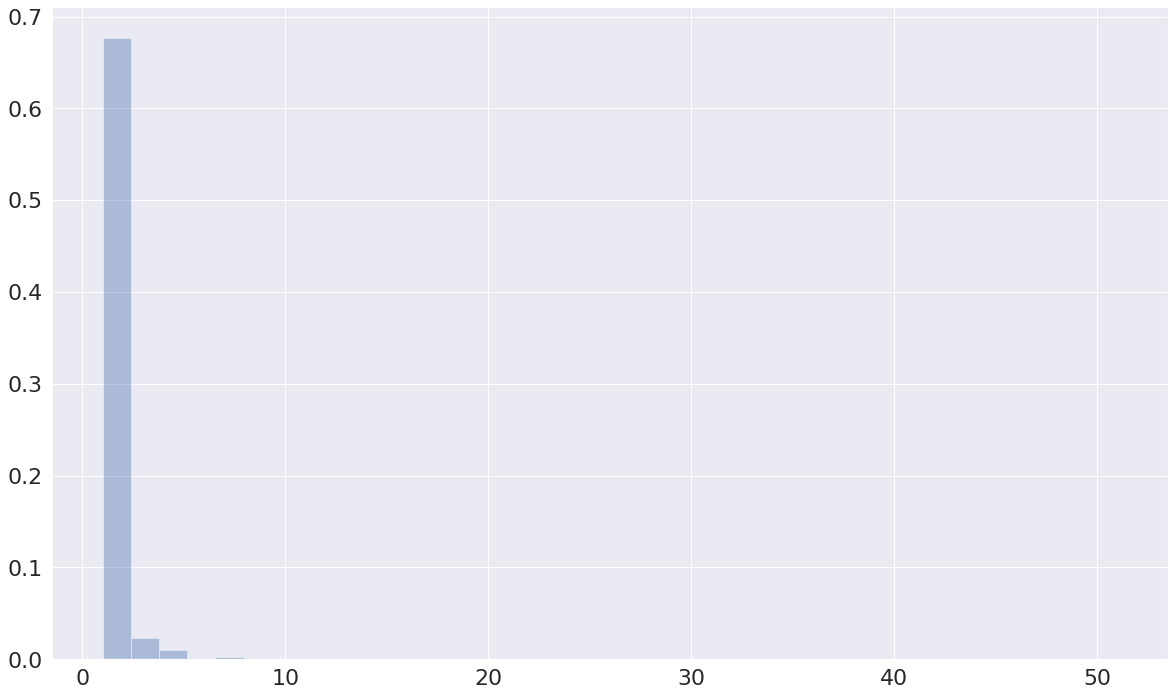

In [ ]:
# degree centrality

degree_centrality = sorted([d for n, d in G.degree()], reverse=True)  # calculate degree centrality from network

ax1 = sns.distplot(degree_centrality) # plot degree distribution
#ax1.set(xscale="log", yscale="log") # if you want log scale plot, remove notation code '#' ahead of codes
ax1.get_lines()[0].remove() # remove distribution apporximation line

plt.show() # dislplay degree distribution

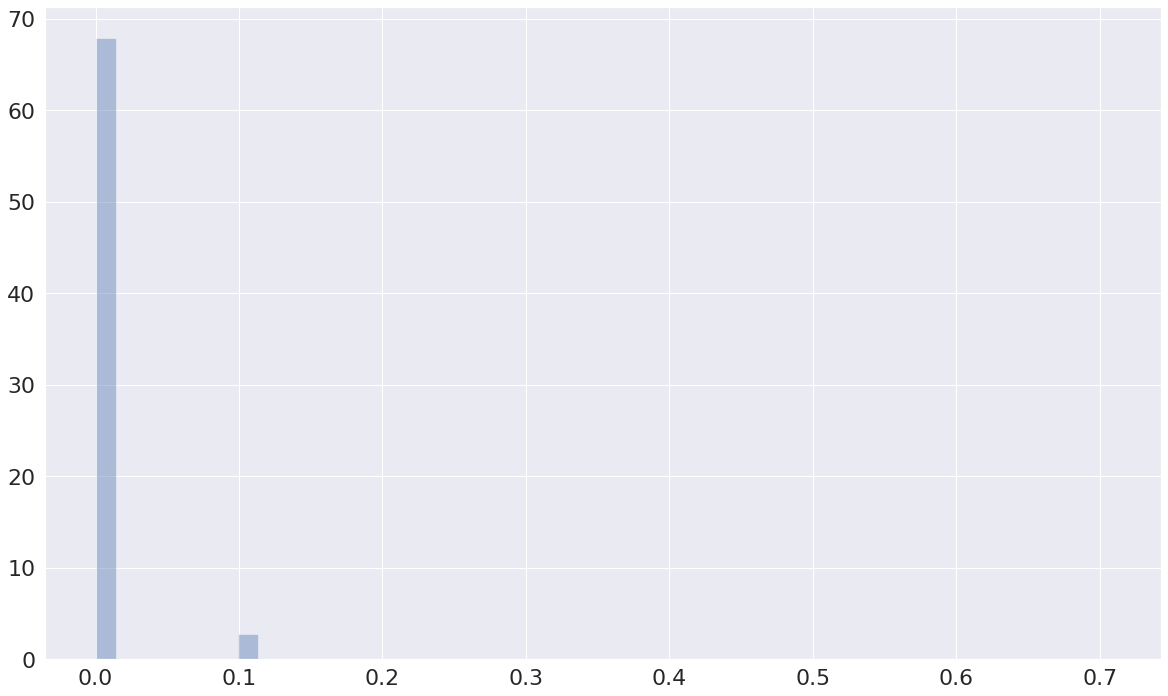

In [ ]:
# eigenvector centrality

eigenvector_centrality = list(nx.eigenvector_centrality(G).values()) # calculate eigenvector centrality from network

ax2 = sns.distplot(eigenvector_centrality) # plot degree distribution
#ax2.set(xscale="log", yscale="log") # if you want log scale plot, remove notation code '#' ahead of codes
ax2.get_lines()[0].remove() # remove distribution apporximation line

plt.show() # dislplay degree distribution

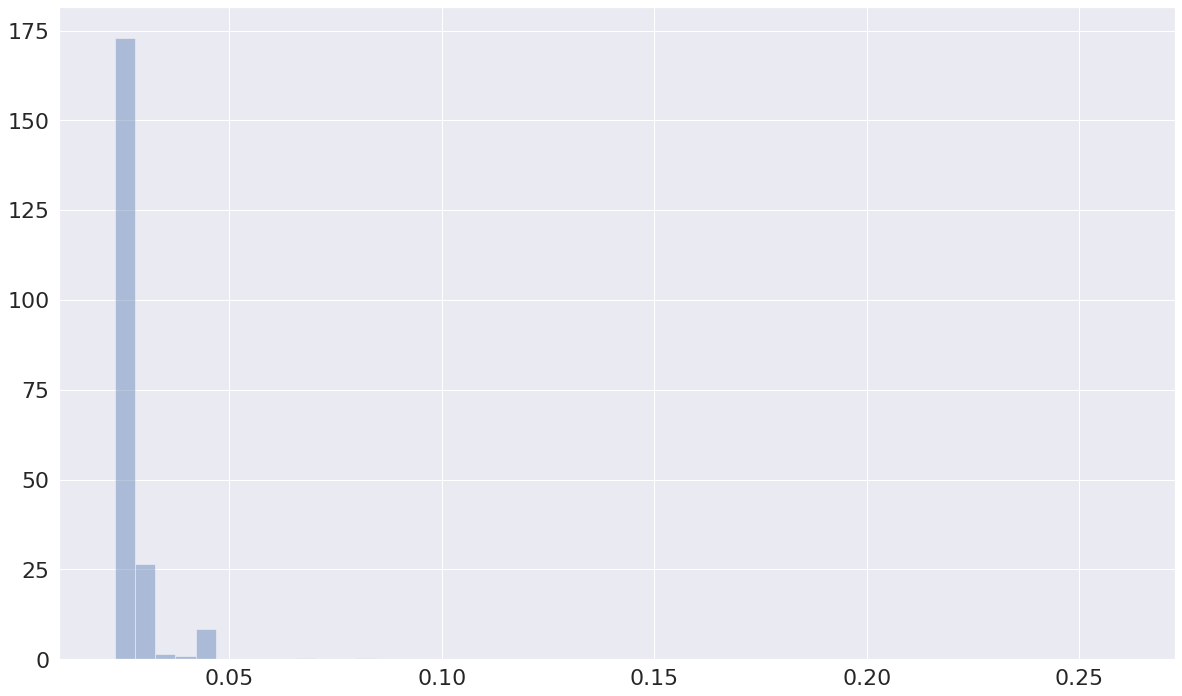

In [ ]:
# katz centrality

katz_centrality = list(nx.katz_centrality(G).values()) # calculate katz centrality from network

ax3 = sns.distplot(katz_centrality) # plot degree distribution
#ax3.set(xscale="log", yscale="log") # if you want log scale plot, remove notation code '#' ahead of codes
ax3.get_lines()[0].remove() # remove distribution apporximation line

plt.show() # dislplay degree distribution

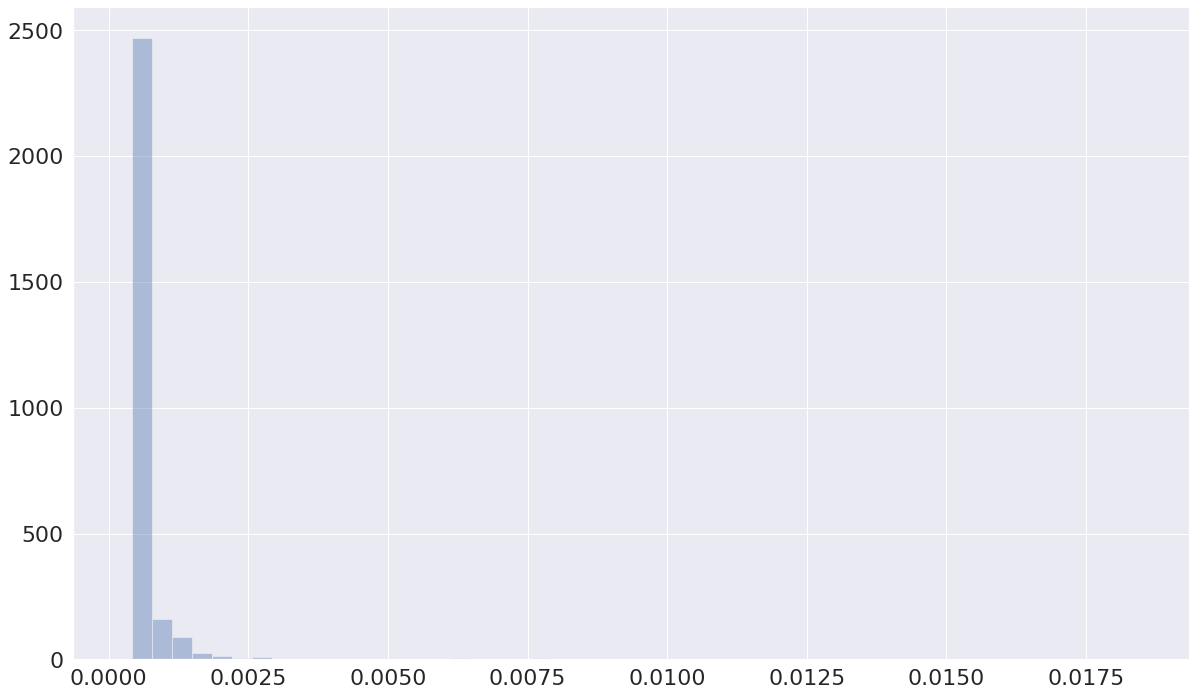

In [ ]:
# pagerank

pagerank = list(nx.pagerank(G).values()) # calculate pagerank from network

ax4 = sns.distplot(pagerank) # plot degree distribution
#ax4.set(xscale="log", yscale="log") # if you want log scale plot, remove notation code '#' ahead of codes
ax4.get_lines()[0].remove() # remove distribution apporximation line

plt.show() # dislplay degree distribution

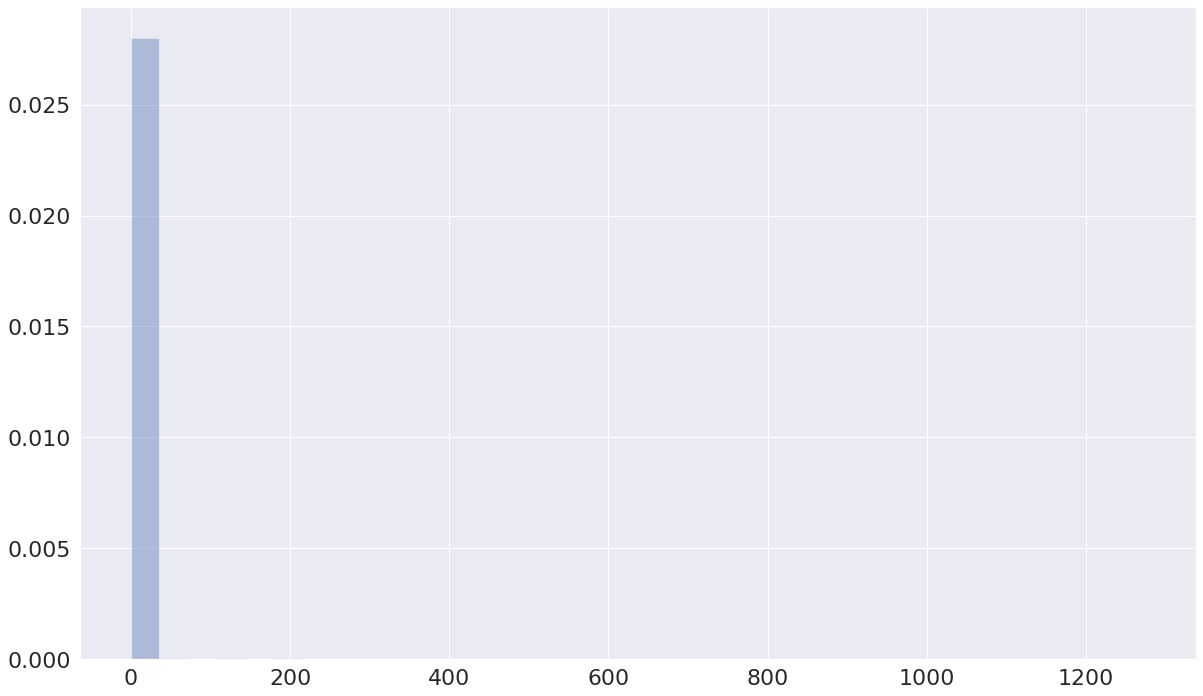

In [ ]:
# betweenness centrality

betweenness_centrality = list(nx.betweenness_centrality(G, normalized=False).values()) # calculate betweenness centrality from network

ax5 = sns.distplot(betweenness_centrality) # plot degree distribution
#ax5.set(xscale="log", yscale="log") # if you want log scale plot, remove notation code '#' ahead of codes
ax5.get_lines()[0].remove() # remove distribution apporximation line

plt.show() # dislplay degree distribution

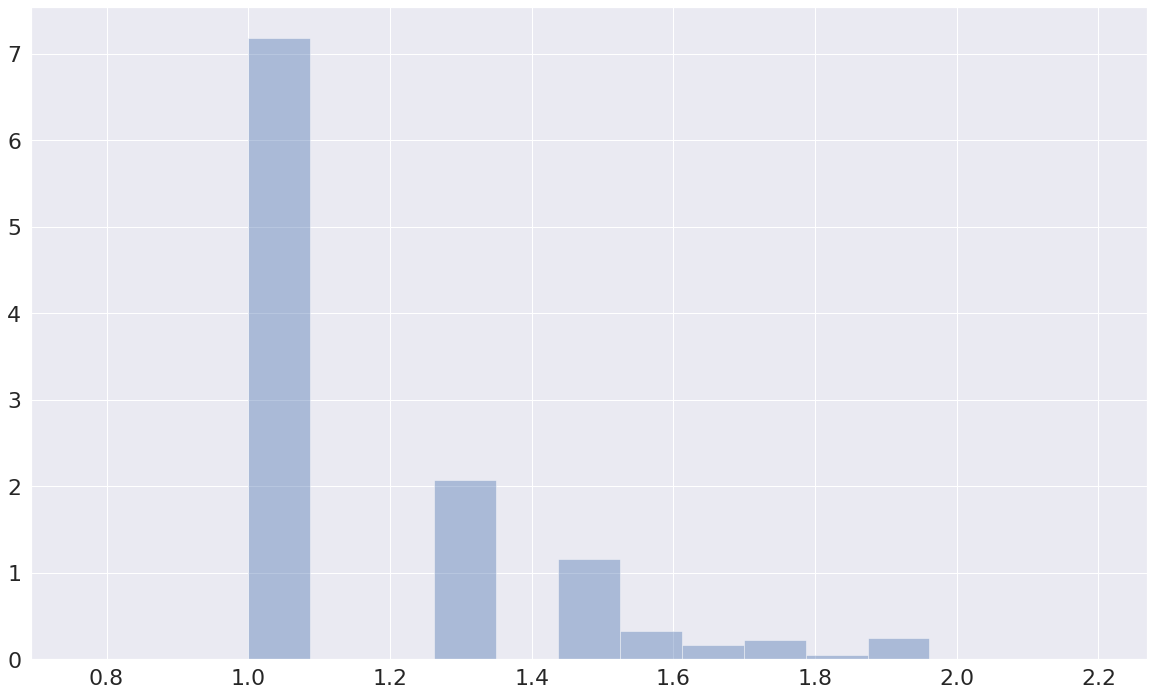

In [ ]:
#clossnes centrality
clossnes_centrality = [nx.average_shortest_path_length(c) for c in (G.subgraph(c).copy() for c in nx.connected_components(G))] # calculate clossnes centrality from network

ax6 = sns.distplot(clossnes_centrality) # plot degree distribution
#ax6.set(xscale="log", yscale="log") # if you want log scale plot, remove notation code '#' ahead of codes
ax6.get_lines()[0].remove() # remove distribution apporximation line

plt.show() # dislplay degree distribution

## R3: Region and visit network analysis
1. Is there any difference in the form of network depending on each provicne of infection?

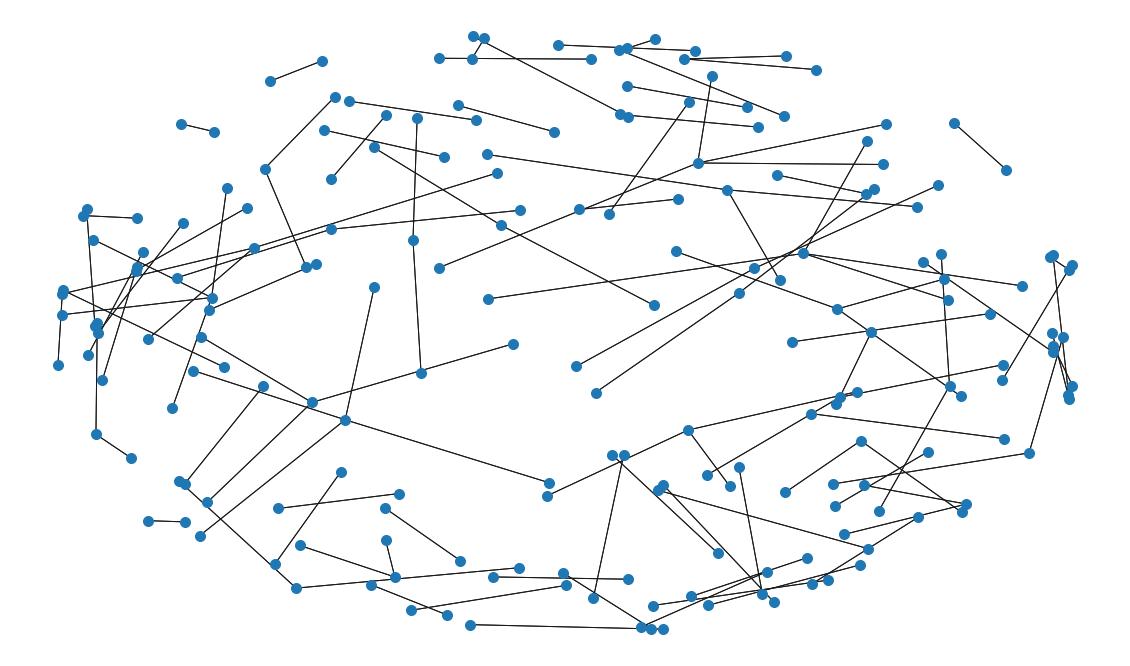

In [ ]:
# As an example for province of most infected people, choose Seoul
df_seoul = df[df['province'] == 'Seoul'] # Indexing data by provicne equal to Seoul

G_seoul = nx.from_pandas_edgelist(df_seoul, source='patient_id', target='infected_by', edge_attr=True) # from DataFrame, make network edge list of patient infection
G_seoul.add_nodes_from(nodes_for_adding=df_seoul['patient_id'].tolist()) # add nodes

pos_seoul = nx.spring_layout(G_seoul, k=5/math.sqrt(G_seoul.order()), iterations=50) # position arrangement by iterative algorithm for better sight

nx.draw_networkx(G_seoul, pos_seoul, node_size=100, with_labels=False) # draw network with nodes
nx.draw_networkx_edges(G_seoul, pos_seoul) # draw edge

plt.axis('off') # for better watch, remove axis grid from plot
plt.show() # display network plot

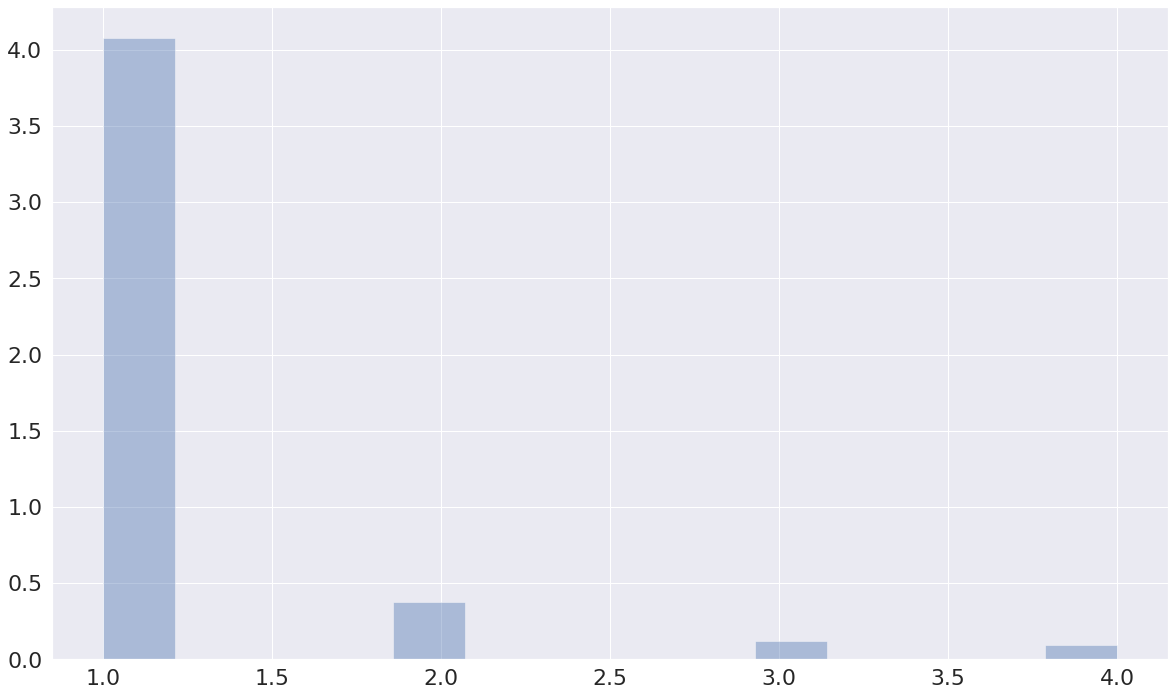

In [ ]:
# degree centrality of Seoul network

degree_centrality_seoul = sorted([d for n, d in G_seoul.degree()], reverse=True)  # calculate degree centrality from Seoul network

ax_seoul = sns.distplot(degree_centrality_seoul) # plot degree distribution
#ax_seoul.set(xscale="log", yscale="log")  # if you want log scale plot, remove notation code '#' ahead of codes
ax_seoul.get_lines()[0].remove() # remove distribution apporximation line

plt.show() # dislplay degree distribution

In [ ]:
# number of connected components Seoul
nx.number_connected_components(G_seoul)

80

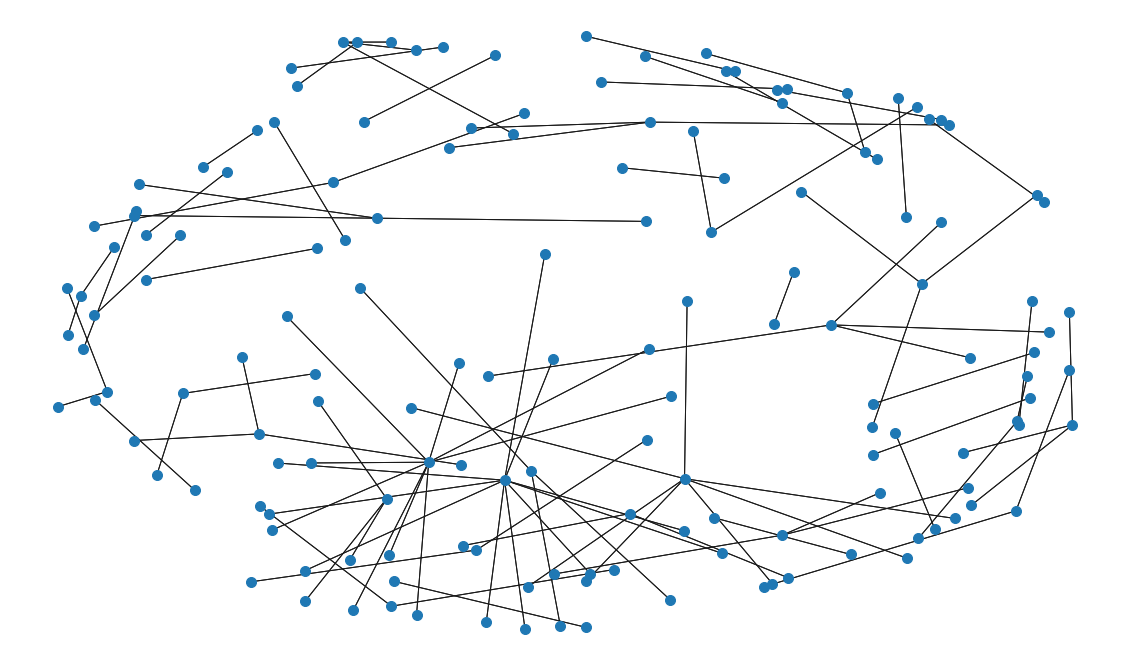

In [ ]:
# As an example for province of most infected people, choose Daegu and Gyeongsangbuk-do
df_daegu = df[(df['province'] == 'Daegu') | (df['province'] == 'Gyeongsangbuk-do')]  # Indexing data by provicne equal to Daegu or Gyeongsangbuk-do

G_daegu = nx.from_pandas_edgelist(df_daegu, source='patient_id', target='infected_by', edge_attr=True) # from DataFrame, make network edge list of patient infection
G_daegu.add_nodes_from(nodes_for_adding=df_daegu['patient_id'].tolist()) # add nodes

pos_daegu = nx.spring_layout(G_daegu, k=5/math.sqrt(G_daegu.order()), iterations=50) # position arrangement by iterative algorithm for better sight

nx.draw_networkx(G_daegu, pos_daegu, node_size=100, with_labels=False) # draw network with nodes
nx.draw_networkx_edges(G_daegu, pos_daegu) # draw edge

plt.axis('off') # for better watch, remove axis grid from plot
plt.show() # display network plot

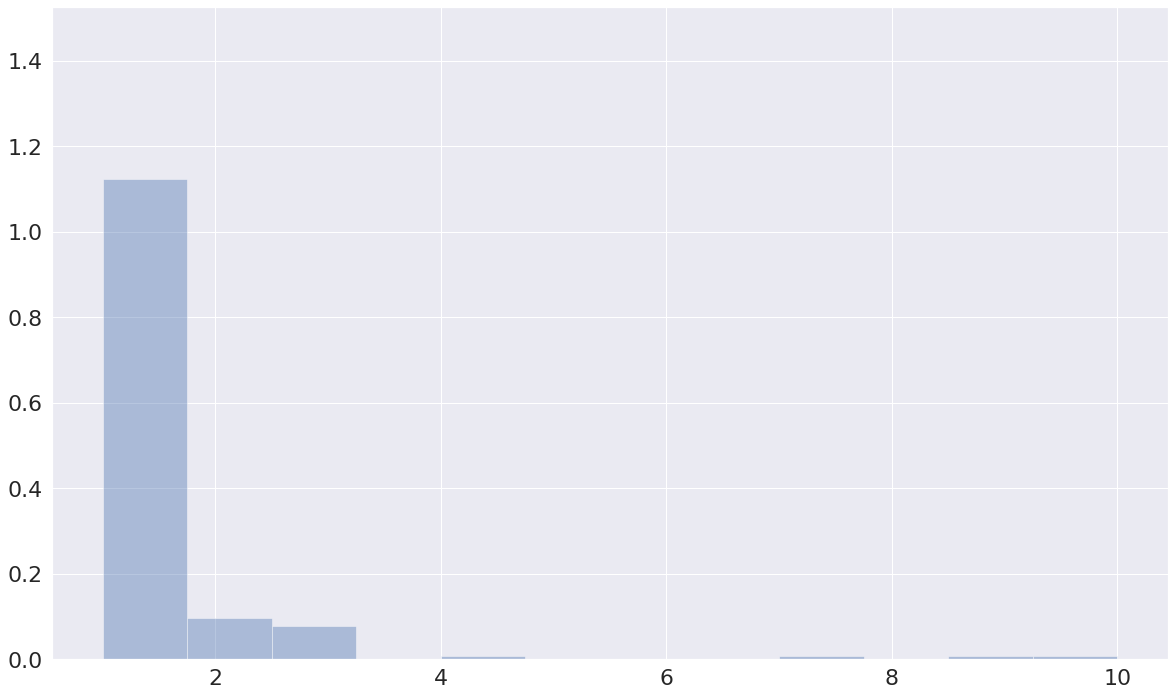

In [ ]:
# degree centrality of Daegu and Gyeongsangbuk-do network

degree_centrality_daegu = sorted([d for n, d in G_daegu.degree()], reverse=True)  # calculate degree centrality from Daegu and Gyeongsangbuk-do network

ax_daegu = sns.distplot(degree_centrality_daegu) # plot degree distribution
#ax_daegu.set(xscale="log", yscale="log") # if you want log scale plot, remove notation code '#' ahead of codes
ax_daegu.get_lines()[0].remove() # remove distribution apporximation line
plt.show() # dislplay degree distribution

In [ ]:
# number of connected components Daegu
nx.number_connected_components(G_daegu)

49

In [ ]:
# make histogram to calculate probability distribution for KL divergence
daegu_data = np.array(degree_centrality_daegu)
hist_d, bins_d = np.histogram(daegu_data, bins=np.linspace(1,10,10))

In [ ]:
# calculate probability
hist_d = hist_d / hist_d.sum()

In [ ]:
# make histogram to calculate probability distribution for KL divergence
seoul_data = np.array(degree_centrality_seoul)
hist_s, bins_s = np.histogram(seoul_data, bins=np.linspace(1,10,10))

In [ ]:
# calculate probability
hist_s = hist_s / hist_s.sum()

In [ ]:
# epsilon to prevent devide by zero
eps = 1e-16

In [ ]:
# define KL divergence between two probablity distribution
def kl_divergence(p, q):
	return np.sum(p[i] * np.log2((p[i]+eps)/(q[i]+eps)) for i in range(len(p)))

In [ ]:
# calculate KL divergence
kl_divergence(hist_d.tolist(), hist_s.tolist())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  This is separate from the ipykernel package so we can avoid doing imports until


0.9185797136145508

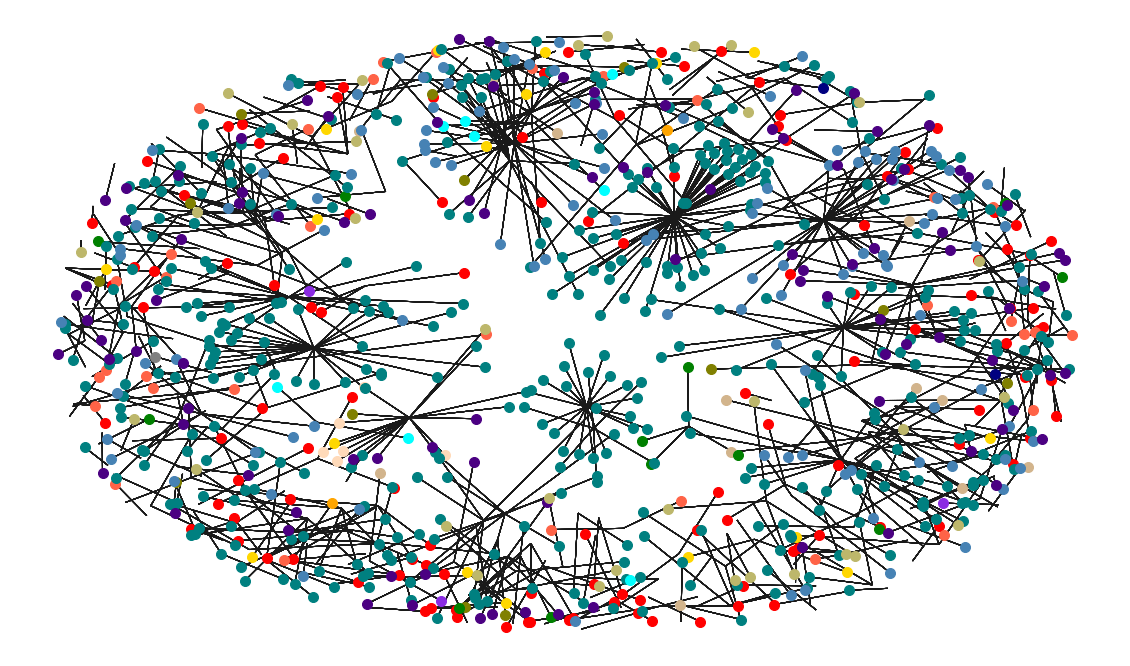

In [ ]:
# Visualize network by diffferent color for province

G = nx.from_pandas_edgelist(df, source='patient_id', target='infected_by', edge_attr=True) # from DataFrame, make network edge list of patient infection

G.add_nodes_from([(i,dict(province=j)) for i, j in zip(df['patient_id'], df['province'])]) # add nodes

pos = nx.spring_layout(G, k=5/math.sqrt(G.order()), iterations=50) # position arrangement by iterative algorithm for better sight

# plot network by province
nx.draw_networkx(G, pos, node_size=100, with_labels=False, nodelist=df[df['province']=='Seoul']['patient_id'].tolist(), node_color='red')
nx.draw_networkx(G, pos, node_size=100, with_labels=False, nodelist=df[df['province']=='Busan']['patient_id'].tolist(), node_color='tomato')
nx.draw_networkx(G, pos, node_size=100, with_labels=False, nodelist=df[df['province']=='Daegu']['patient_id'].tolist(), node_color='peachpuff')
nx.draw_networkx(G, pos, node_size=100, with_labels=False, nodelist=df[df['province']=='Gwangju']['patient_id'].tolist(), node_color='tan')
nx.draw_networkx(G, pos, node_size=100, with_labels=False, nodelist=df[df['province']=='Incheon']['patient_id'].tolist(), node_color='orange')
nx.draw_networkx(G, pos, node_size=100, with_labels=False, nodelist=df[df['province']=='Daejeon']['patient_id'].tolist(), node_color='gold')
nx.draw_networkx(G, pos, node_size=100, with_labels=False, nodelist=df[df['province']=='Ulsan']['patient_id'].tolist(), node_color='olive')
nx.draw_networkx(G, pos, node_size=100, with_labels=False, nodelist=df[df['province']=='Sejong']['patient_id'].tolist(), node_color='green')
nx.draw_networkx(G, pos, node_size=100, with_labels=False, nodelist=df[df['province']=='Gyeonggi-do']['patient_id'].tolist(), node_color='teal')
nx.draw_networkx(G, pos, node_size=100, with_labels=False, nodelist=df[df['province']=='Chungcheongbuk-do']['patient_id'].tolist(), node_color='aqua')
nx.draw_networkx(G, pos, node_size=100, with_labels=False, nodelist=df[df['province']=='Chungcheongnam-do']['patient_id'].tolist(), node_color='steelblue')
nx.draw_networkx(G, pos, node_size=100, with_labels=False, nodelist=df[df['province']=='Jeollabuk-do']['patient_id'].tolist(), node_color='navy')
nx.draw_networkx(G, pos, node_size=100, with_labels=False, nodelist=df[df['province']=='Jeollanam-do']['patient_id'].tolist(), node_color='blueviolet')
nx.draw_networkx(G, pos, node_size=100, with_labels=False, nodelist=df[df['province']=='Gyeongsangbuk-do']['patient_id'].tolist(), node_color='indigo')
nx.draw_networkx(G, pos, node_size=100, with_labels=False, nodelist=df[df['province']=='Gyeongsangnam-do']['patient_id'].tolist(), node_color='darkkhaki')
nx.draw_networkx(G, pos, node_size=100, with_labels=False, nodelist=df[df['province']=='Jeju-do']['patient_id'].tolist(), node_color='gray')

plt.axis('off') # for better watch, remove axis grid from plot
plt.show() # display network